## DTSA 5011: Skin Cancer Detection with CNN Models

In this project, I will create two different Convoluted Neural Network models and compare their ability to accuratly classify skin cancer and other dermatological lesions. In the firs model I will use th

### Purpose/ Motivation:

The purpose of this project is to use several CNN techniques to classify types of skin cancer. There are many different types of skin cancer; however, there are several that doctors commonly screen for, including: Actinic Keratosis (precanceous lesions), Basal Cell Carcinoma (BCC), Squamous Cell Carcinoma (SCC), Melanoma and Merkel cell carcinoma. Melanoma and Merkel Cell Carcinoma are considered more dangerous due to their fast growth rates and ability to spread to the lymph nodes and other vital organs. Basal and Squamous Cell Carcinoma are less dangerous if they are treated early. Both BCC and SCC are slow growing types of skin cancer, however, there is still potential for them to damage tissue and even spread to lymph nodes.

Early detection and frequent skin cancer screenings can significantly reduce the risk of a metastatic skin cancer diagnosis.

Creating a skin cancer detection tool could serve as a decision support system to complement clinical examination, helping providers prioritize suspicious lesions for biopsy or flag potentially concerning cases during full-body skin examinations. Given the time constraints of typical screening appointments (often 15 minutes or less) and the subtle visual differences between lesion types, computational tools have the potential to reduce diagnostic errors and improve patient outcomes through earlier, more accurate detection.


### Data citation:

Tschandl, P., Rosendahl, C. & Kittler, H. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci. Data 5, 180161 (2018). https://doi.org/10.1038/sdata.2018.161


### Dataset Description

The HAM10000 dataset contains 10,015 dermatoscopic images of pigmented skin lesions collected over a 20-year period from two primary sources: the Department of Dermatology at the Medical University of Vienna, Austria, and a skin cancer practice at the University of Queensland, Australia. The dataset spans a diverse patient population ranging from 0 to 85 years of age, with a gender distribution of 5,406 male patients, 4,552 female patients, and 57 patients with unknown gender information.

The dataset encompasses seven diagnostic categories representing the most common pigmented lesion types encountered in clinical dermatology practice:

1. Melanocytic nevi (nv): Benign moles - 6,705 images (67.0%)
2. Melanoma (mel): Malignant melanoma - 1,113 images (11.1%)
3. Benign keratosis-like lesions (bkl): Including seborrheic keratoses and solar lentigines - 1,099 images (11.0%)
4. Basal cell carcinoma (bcc): Common form of skin cancer - 514 images (5.1%)
5. Actinic keratoses and intraepithelial carcinoma (akiec): Precancerous lesions - 327 images (3.3%)
6. Vascular lesions (vasc): Including angiomas and pyogenic granulomas - 142 images (1.4%)
7. Dermatofibroma (df): Benign fibrous growths - 115 images (1.1%)

All diagnoses were confirmed through histopathology (biopsy), clinical follow-up, expert consensus, or confocal microscopy. The dataset exhibits significant class imbalance, with melanocytic nevi representing over two-thirds of all samples, while dermatofibroma accounts for just over 1% of the dataset. (The class imbalance will be be covered later on during the data normalization / cleaning section).

In [ ]:
# Step 1: Install and import kagglehub
!pip install kagglehub

import kagglehub

# Step 2: Download the dataset
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")
print("Path to dataset files:", path)

# Step 3: Import necessary libraries
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Step 4: Load the metadata
metadata = pd.read_csv(os.path.join(path, 'HAM10000_metadata.csv'))

# Step 5: Display basic information
print(f"\nTotal images: {len(metadata)}")
print(f"\nClass distribution:")
print(metadata['dx'].value_counts())
print(f"\nColumn names:")
print(metadata.columns.tolist())
print(f"\nFirst few rows:")
print(metadata.head())

# Step 6: Check the image files
image_files = [f for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]
print(f"\nNumber of image files found: {len(image_files)}")


Using Colab cache for faster access to the 'skin-cancer-mnist-ham10000' dataset.
Path to dataset files: /kaggle/input/skin-cancer-mnist-ham10000

Total images: 10015

Class distribution:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

Column names:
['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization']

First few rows:
     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

Number of image files found: 0


### Exploratory Data Analysis:

BASIC DATASET INFORMATION
Dataset shape: (10015, 7)

Column names and types:
lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

Missing values:
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

Basic statistics:
               age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000

CLASS DISTRIBUTION ANALYSIS
Melanocytic Nevi (Benign Moles)    6705
Melanoma                           1113
Benign Keratosis                   1099
Basal Cell Carcinoma                514
Actinic Keratoses                   327
Vascular Lesions                    142
Dermatofibroma                      115
Name: count, dtype: int64

Percentage distribution:
Melanocytic Nevi (Benign Mo

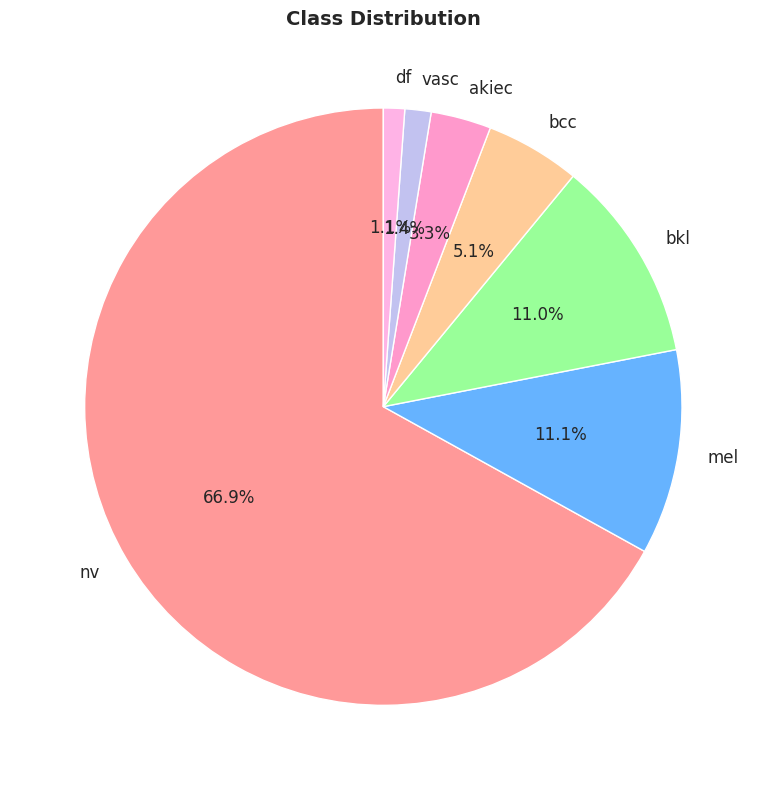


AGE DISTRIBUTION ANALYSIS
Age statistics:
count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

Missing age values: 57


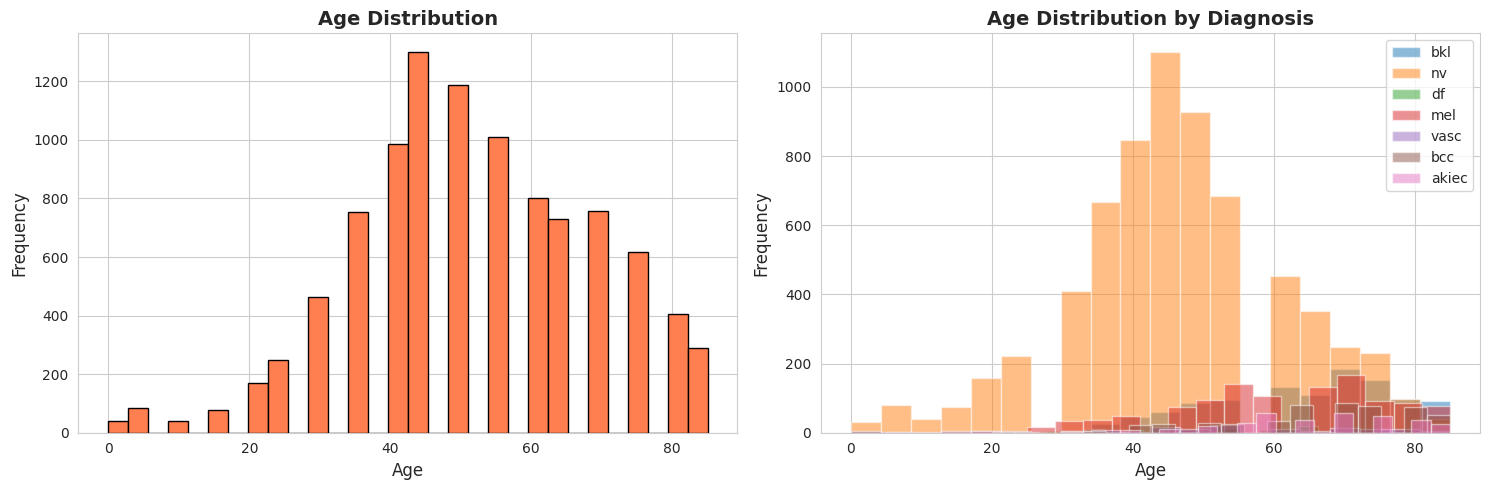


SEX DISTRIBUTION ANALYSIS
sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

Missing sex values: 0


<Figure size 1200x600 with 0 Axes>

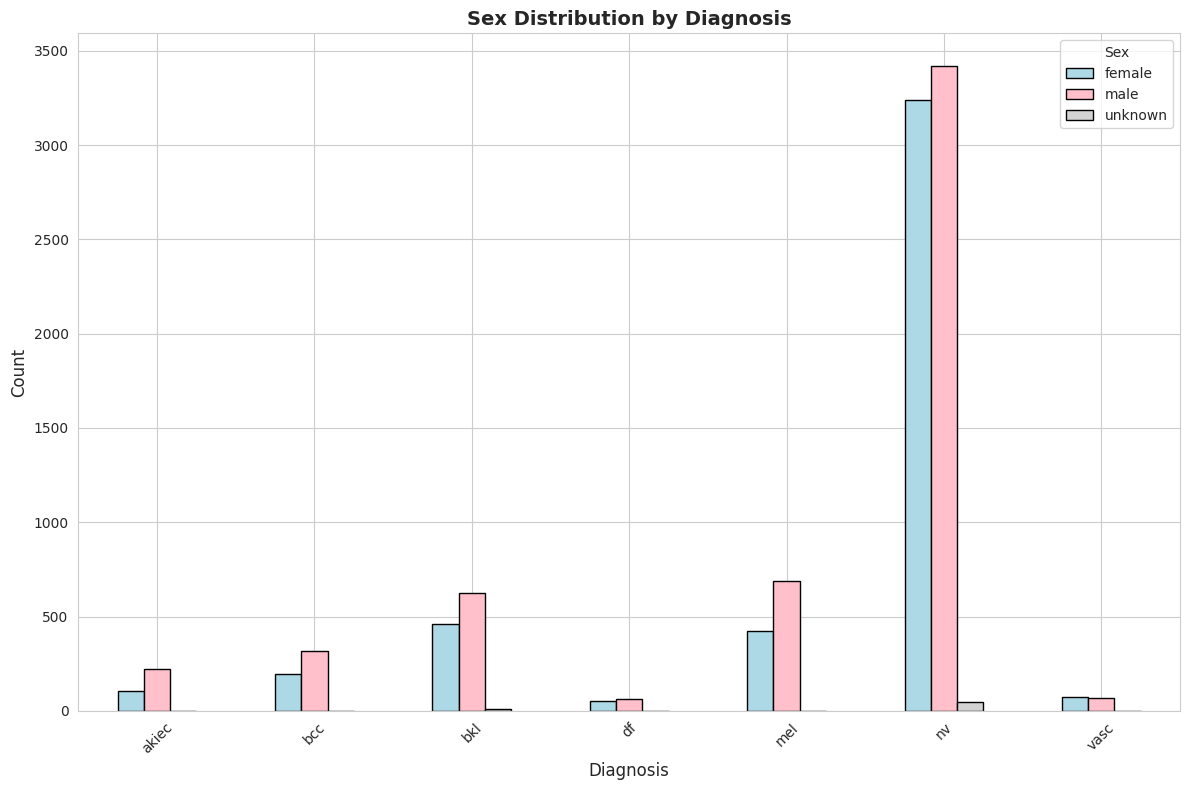


LESION LOCALIZATION ANALYSIS
localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64


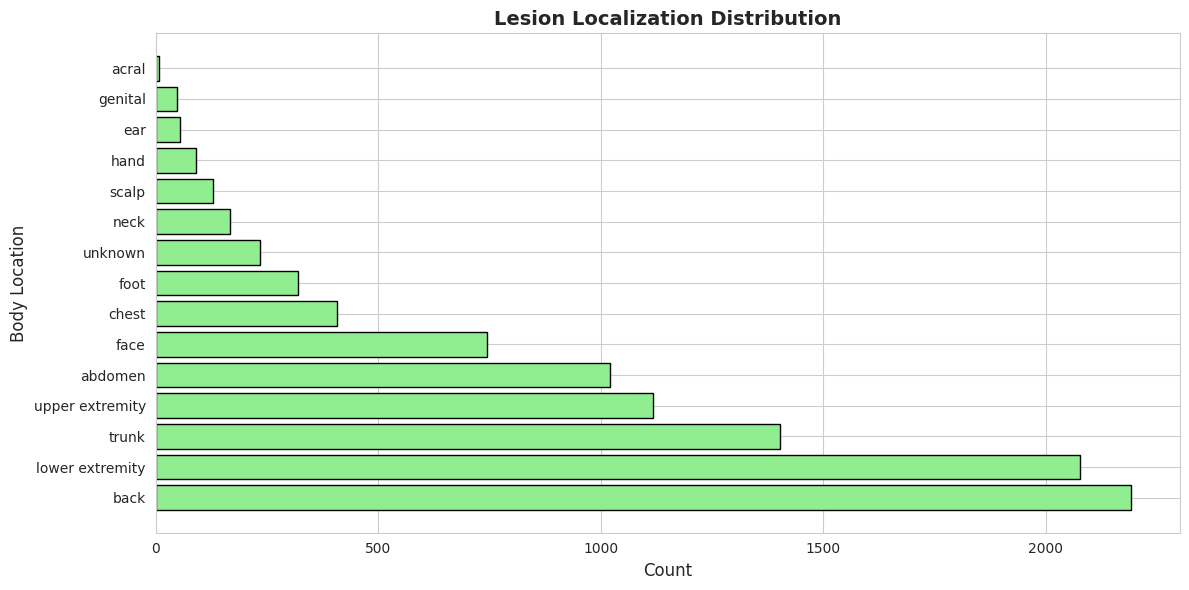


IMAGE CHARACTERISTICS ANALYSIS
Image dimensions sampled: 200
Width range: 600 - 600
Height range: 450 - 450
Most common size: (600, 450)

CLASS IMBALANCE SUMMARY
Most common class: Melanocytic Nevi (Benign Moles) (6705 samples)
Least common class: Dermatofibroma (115 samples)
Imbalance ratio: 58.30:1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Load metadata
metadata = pd.read_csv(os.path.join(path, 'HAM10000_metadata.csv'))

print("="*50)
print("BASIC DATASET INFORMATION")
print("="*50)
print(f"Dataset shape: {metadata.shape}")
print(f"\nColumn names and types:")
print(metadata.dtypes)
print(f"\nMissing values:")
print(metadata.isnull().sum())
print(f"\nBasic statistics:")
print(metadata.describe())

# 1. CLASS DISTRIBUTION
print("\n" + "="*50)
print("CLASS DISTRIBUTION ANALYSIS")
print("="*50)

# Create label mapping for full names
label_mapping = {
    'nv': 'Melanocytic Nevi (Benign Moles)',
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma'
}

class_counts = metadata['dx'].value_counts()

# Create a new series with full names for display
class_counts_named = class_counts.copy()
class_counts_named.index = [label_mapping[idx] for idx in class_counts.index]

print(class_counts_named)
print(f"\nPercentage distribution:")
percentage_dist = (class_counts / len(metadata) * 100).round(2)
percentage_dist.index = [label_mapping[idx] for idx in percentage_dist.index]
print(percentage_dist)

# Visualize class distribution with pie chart (using abbreviated labels)
plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#c2c2f0', '#ffb3e6']

plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. AGE DISTRIBUTION
print("\n" + "="*50)
print("AGE DISTRIBUTION ANALYSIS")
print("="*50)
print(f"Age statistics:")
print(metadata['age'].describe())
print(f"\nMissing age values: {metadata['age'].isnull().sum()}")

# Age distribution plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Overall age distribution
axes[0].hist(metadata['age'].dropna(), bins=30, color='coral', edgecolor='black')
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')

# Age by diagnosis
for dx in metadata['dx'].unique():
    subset = metadata[metadata['dx'] == dx]['age'].dropna()
    axes[1].hist(subset, alpha=0.5, label=dx, bins=20)
axes[1].set_xlabel('Age', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Age Distribution by Diagnosis', fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

# 3. SEX DISTRIBUTION
print("\n" + "="*50)
print("SEX DISTRIBUTION ANALYSIS")
print("="*50)
print(metadata['sex'].value_counts())
print(f"\nMissing sex values: {metadata['sex'].isnull().sum()}")

# Sex by diagnosis only
plt.figure(figsize=(12, 6))
sex_dx = pd.crosstab(metadata['dx'], metadata['sex'])
sex_dx.plot(kind='bar', color=['lightblue', 'pink', 'lightgray'], edgecolor='black')
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sex Distribution by Diagnosis', fontsize=14, fontweight='bold')
plt.legend(title='Sex')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. LOCALIZATION ANALYSIS
print("\n" + "="*50)
print("LESION LOCALIZATION ANALYSIS")
print("="*50)
print(metadata['localization'].value_counts())

# Localization distribution
plt.figure(figsize=(12, 6))
loc_counts = metadata['localization'].value_counts()
plt.barh(loc_counts.index, loc_counts.values, color='lightgreen', edgecolor='black')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Body Location', fontsize=12)
plt.title('Lesion Localization Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. IMAGE ANALYSIS (sample a few images)
print("\n" + "="*50)
print("IMAGE CHARACTERISTICS ANALYSIS")
print("="*50)

# Get a few sample images to check dimensions
sample_sizes = []
for i in range(min(100, len(metadata))):
    img_id = metadata['image_id'].iloc[i]
    for root, dirs, files in os.walk(path):
        for file in files:
            if img_id in file and (file.endswith('.jpg') or file.endswith('.png')):
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                sample_sizes.append(img.size)
                break

if sample_sizes:
    widths, heights = zip(*sample_sizes)
    print(f"Image dimensions sampled: {len(sample_sizes)}")
    print(f"Width range: {min(widths)} - {max(widths)}")
    print(f"Height range: {min(heights)} - {max(heights)}")
    print(f"Most common size: {max(set(sample_sizes), key=sample_sizes.count)}")

# 6. CLASS IMBALANCE SUMMARY
print("\n" + "="*50)
print("CLASS IMBALANCE SUMMARY")
print("="*50)

max_class = class_counts.max()
min_class = class_counts.min()
imbalance_ratio = max_class / min_class

print(f"Most common class: {label_mapping[class_counts.idxmax()]} ({max_class} samples)")
print(f"Least common class: {label_mapping[class_counts.idxmin()]} ({min_class} samples)")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")


### Sample Data:

Below is a sample of images from the HAM10000 dataset. There are 5 different images of each type of dermatological lesion, including: Actinic Keratoses, Basal Cell Carcinoma, Benign Keratoses, Dermatofibromas, Melanoma, Benign Moles, and Vascular lesions.

DISPLAYING SAMPLE IMAGES FOR EACH CLASS


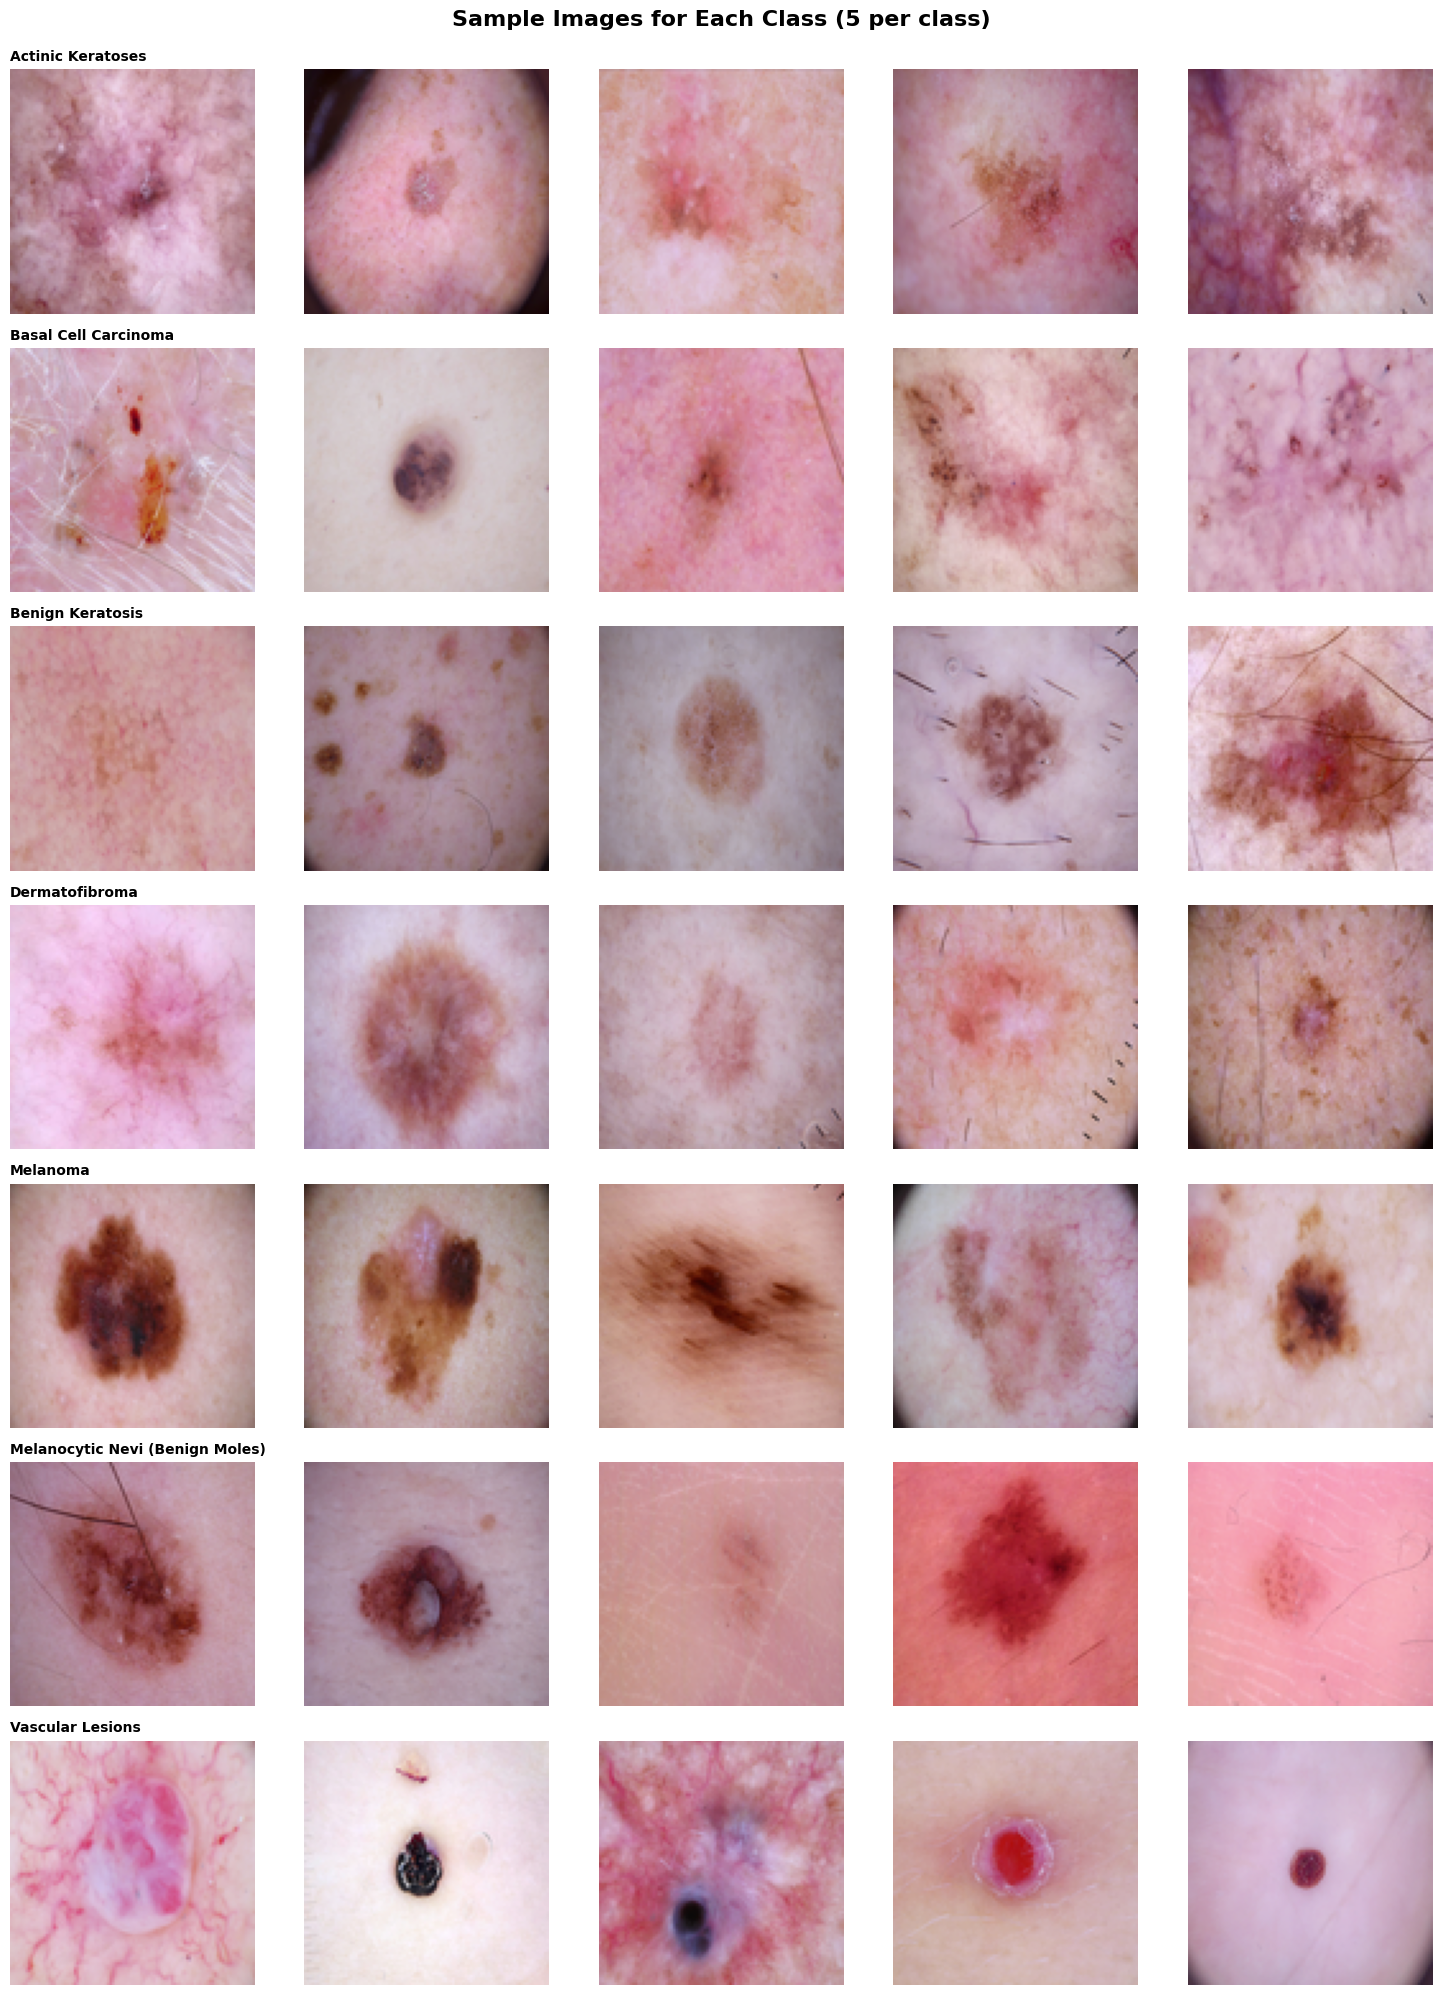


Displayed 5 sample images for each of the 7 classes


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

print("="*70)
print("DISPLAYING SAMPLE IMAGES FOR EACH CLASS")
print("="*70)

# Get 5 samples per class
samples_per_class = 5

# Create figure
fig, axes = plt.subplots(7, samples_per_class, figsize=(15, 20))

for class_idx in range(7):
    # Get class name
    class_name_short = label_encoder.inverse_transform([class_idx])[0]
    class_name_full = label_mapping[class_name_short]

    # Find indices of this class in training data
    class_indices = np.where(y_train == class_idx)[0]

    # Randomly select 5 samples
    selected_indices = np.random.choice(class_indices, size=samples_per_class, replace=False)

    # Display each sample
    for col_idx, img_idx in enumerate(selected_indices):
        ax = axes[class_idx, col_idx]
        ax.imshow(X_train[img_idx])
        ax.axis('off')

        # Add title only to first column
        if col_idx == 0:
            ax.set_title(f"{class_name_full}", fontsize=10, fontweight='bold', loc='left')

plt.suptitle('Sample Images for Each Class (5 per class)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\nDisplayed 5 sample images for each of the 7 classes")

### EDA Discussion:

Based off of our EDA we found that there is an extemely high prevalence of nv or benign mole diagnoses. From all of the imaging data collected, 67%, were benign moles. Even if we did no training at all we could predict that a lesion was a benign mole and have about a 67% accuracy. However, this would completely negate the importance of making the tool in the first place, which is to better detect harmful types of cancer such as melanoma and merkal cell.

To help the model understand mislabeling melanoma and other types of cancers is bad, I will essentially put more weight on the cancer diagnoses. To do this I will use the the loss function to specify different weights for each type of diagnosis.

I also normalized the pixel values from 0.0-1.0 so that my model is more stable an, more efficient and has a better final accuracy.

### Data Preprocessing and Normalization:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow import keras
from tensorflow.keras import layers, models
from PIL import Image
import os
import matplotlib.pyplot as plt

# Load metadata
metadata = pd.read_csv(os.path.join(path, 'HAM10000_metadata.csv'))

# Create label mapping
label_mapping = {
    'nv': 'Melanocytic Nevi (Benign Moles)',
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma'
}

# Encode labels to integers (0-6)
label_encoder = LabelEncoder()
metadata['label'] = label_encoder.fit_transform(metadata['dx'])

def load_and_preprocess_images(metadata, img_size=(96, 96)):
    images = []
    labels = []
    skipped = 0

    for idx, row in metadata.iterrows():
        img_id = row['image_id']
        label = row['label']

        img_found = False
        for root, dirs, files in os.walk(path):
            for file in files:
                if img_id in file and (file.endswith('.jpg') or file.endswith('.png')):
                    img_path = os.path.join(root, file)

                    try:
                        img = Image.open(img_path)
                        img = img.convert('RGB')
                        img = img.resize(img_size, Image.LANCZOS)
                        img = np.array(img)
                        img = img.astype('float32') / 255.0

                        images.append(img)
                        labels.append(label)
                        img_found = True

                    except Exception as e:
                        skipped += 1

                    break

            if img_found:
                break

        if not img_found:
            skipped += 1

        if (idx + 1) % 1000 == 0:
            print(f"Loaded {idx + 1}/{len(metadata)} images...")

    return np.array(images), np.array(labels)

X, y = load_and_preprocess_images(metadata)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=42)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

Loaded 1000/10015 images...
Loaded 2000/10015 images...
Loaded 3000/10015 images...
Loaded 4000/10015 images...
Loaded 5000/10015 images...
Loaded 6000/10015 images...
Loaded 7000/10015 images...
Loaded 8000/10015 images...
Loaded 9000/10015 images...
Loaded 10000/10015 images...


### Data Preprocessing and Normalization

Data preprocessing ensured the HAM10000 dataset was properly prepared for neural network training. All 10,015 dermoscopic images were standardized to 96x96 pixel resolution using LANCZOS resampling to capture visual features like borders and color variations. The most critical step involved normalizing pixel values from 0-255 to 0-1 by dividing by 255.0. This essentially mitigated any exploding gradients that occurred during backpropagation.

The dataset was then split using stratified sampling into training (70%), validation (15%), and test (15%) sets. This was crucial given the severe imbalance where benign moles comprised 67% of samples while dermatofibroma represented only 1.15%.


### Model 1: Complex CNN with Class Weighting

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 94, 94, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 2,624,199 (10.01 MB)

 Trainable params: 2,621,703 (10.00 MB)

 Non-trainable params: 2,496 (9.75 KB)

Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 0.2092 - loss: 2.9040
Epoch 1: val_accuracy improved from -inf to 0.01401, saving model to best_model.keras
220/220 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.2094 - loss: 2.9020 - val_accuracy: 0.0140 - val_loss: 4.3739 - learning_rate: 0.0010
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.3133 - loss: 1.9454
Epoch 2: val_accuracy improved from 0.01401 to 0.02535, saving model to best_model.keras
220/220 ━━━━━━━━━━━━━━━━━━━━ 256s 986ms/step - accuracy: 0.3134 - loss: 1.9453 - val_accuracy: 0.0254 - val_loss: 3.3081 - learning_rate: 0.0010
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 950ms/step - accuracy: 0.3547 - loss: 1.7297
Epoch 3: val_accuracy improved from 0.02535 to 0.16344, saving model to best_model.keras
220/220 ━━━━━━━━━━━━━━━━━━━━ 265s 998ms/step - accuracy: 0.3548 - loss: 1.7294 - val_accuracy: 0.1634 - val_loss: 2.5246 - learning_rate: 0.0010
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 

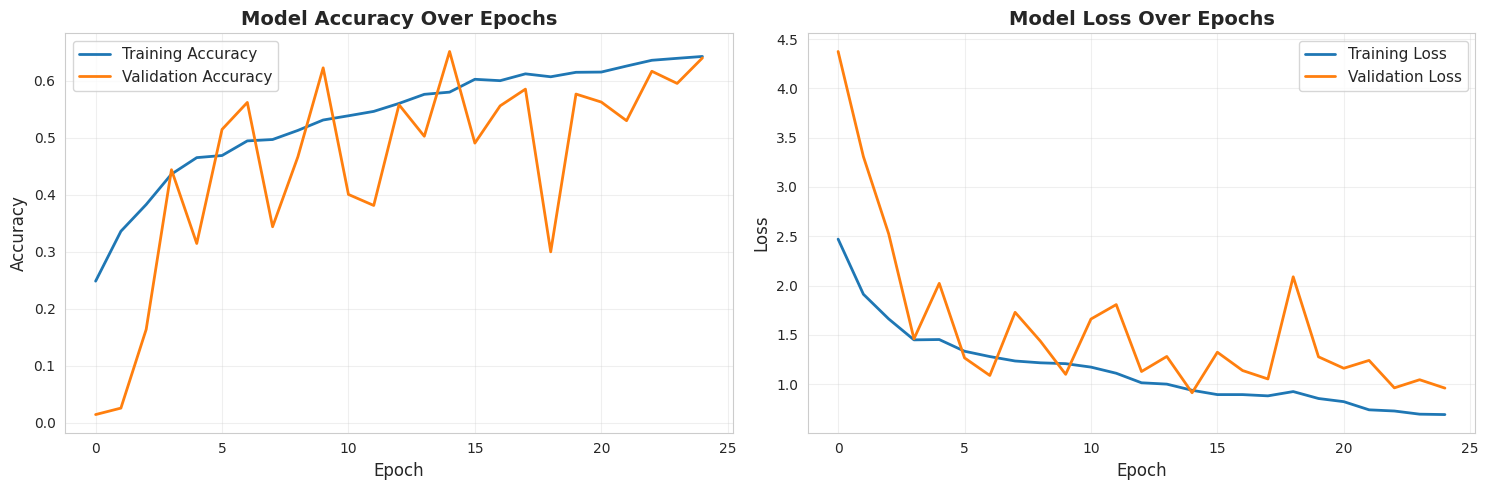

47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 261ms/step

Classification Report (Validation Set):
              precision    recall  f1-score   support

       akiec     0.3165    0.5102    0.3906        49
         bcc     0.3769    0.6364    0.4734        77
         bkl     0.4350    0.5305    0.4780       164
          df     0.1081    0.2353    0.1481        17
         mel     0.3806    0.6108    0.4690       167
          nv     0.9387    0.6863    0.7929      1004
        vasc     0.3922    0.9524    0.5556        21

    accuracy                         0.6511      1499
   macro avg     0.4211    0.5945    0.4725      1499
weighted avg     0.7551    0.6511    0.6821      1499



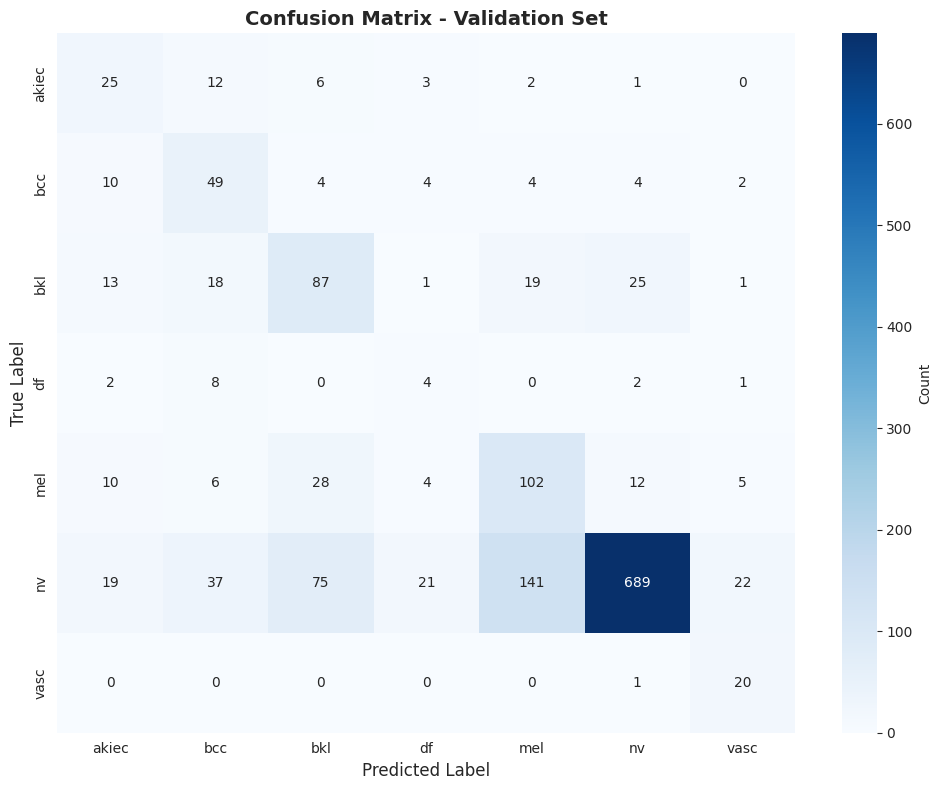

47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 243ms/step

Test Set Results:
  Test Accuracy: 0.6494
  Test Loss: 0.9134

Classification Report (Test Set):
              precision    recall  f1-score   support

       akiec     0.3797    0.6122    0.4688        49
         bcc     0.4160    0.6753    0.5149        77
         bkl     0.4190    0.5333    0.4693       165
          df     0.3077    0.4706    0.3721        17
         mel     0.3206    0.5030    0.3916       167
          nv     0.9391    0.6899    0.7954      1006
        vasc     0.3226    0.9091    0.4762        22

    accuracy                         0.6494      1503
   macro avg     0.4435    0.6276    0.4983      1503
weighted avg     0.7521    0.6494    0.6803      1503



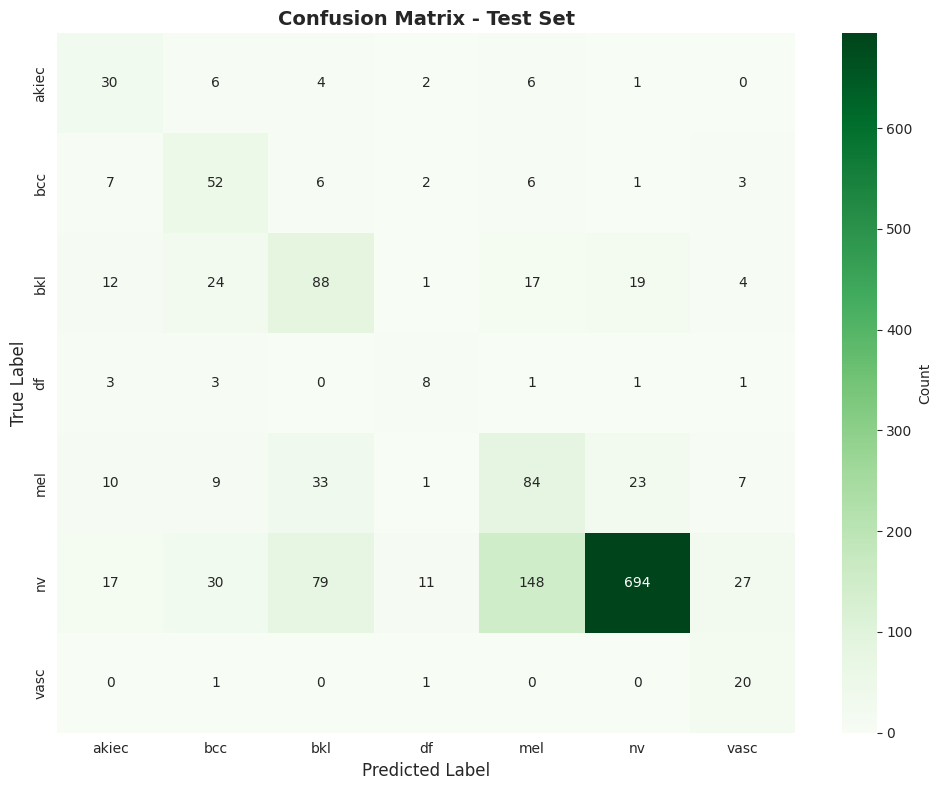

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Fourth Convolutional Block
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output Layer - 7 classes with softmax
    layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

checkpoint = keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stopping, reduce_lr, checkpoint]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred_classes, target_names=label_encoder.classes_, digits=4))

cm = confusion_matrix(y_val, y_val_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Validation Set', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

print("\nTest Set Results:")
print(f"  Test Accuracy: {test_accuracy:.4f}")
print(f"  Test Loss: {test_loss:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_classes, target_names=label_encoder.classes_, digits=4))

cm_test = confusion_matrix(y_test, y_test_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Test Set', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

model.save('skin_lesion_cnn_model.keras')
model.save('skin_lesion_cnn_model.h5')

### **Model 1 Discussion:**

Model 1 employed four convolutional blocks with filter progression of 32 -> 64 -> 128 -> 256, each followed by Batch Normalization, Max Pooling, and dropout, plus two dense layers totaling 2.6 million parameters. The defining technique was aggressive class weighting from 0.21 for benign moles to 12.44 for dermatofibroma, making rare class misclassifications contribute 59x more to loss. While intended to force attention to minority classes, this created oversensitivity with high recall but very low precision on rare classes. The model used Adam optimizer with a 0.001 learning rate, early stopping, and learning rate reduction when validation loss plateaued.

Based on the Validation Accuracy results above, we can indicate that our Model 1 performed moderately well; however, it could not be used as a diagnostic tool yet. At Epoch 2, the validation accuracy was only at 0.0254. Although the validation accuracy jumped to 0.4436 at Epoch 4, it only reached a validation accuracy rating of 0.6494 and stopped training after Epoch 25.


### **Model 2: Simple CNN with Data Augmentation**

LOADING DATA
Using Colab cache for faster access to the 'skin-cancer-mnist-ham10000' dataset.
Dataset path: /kaggle/input/skin-cancer-mnist-ham10000

Loading images at 96×96...
Loaded 1000/10015 images...
Loaded 2000/10015 images...
Loaded 3000/10015 images...
Loaded 4000/10015 images...
Loaded 5000/10015 images...
Loaded 6000/10015 images...
Loaded 7000/10015 images...
Loaded 8000/10015 images...
Loaded 9000/10015 images...
Loaded 10000/10015 images...

Training: 7013 samples
Validation: 1499 samples
Test: 1503 samples

MODEL 2: SIMPLE CNN + DATA AUGMENTATION

Model 2 Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 96, 96, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,204,263 (4.59 MB)

 Trainable params: 1,204,263 (4.59 MB)

 Non-trainable params: 0 (0.00 B)


Training Model 2...
Epoch 1/30
214/220 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6514 - loss: 1.0896
Epoch 1: val_accuracy improved from -inf to 0.67245, saving model to best_model2_simple.keras
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6520 - loss: 1.0864 - val_accuracy: 0.6724 - val_loss: 0.9481 - learning_rate: 0.0010
Epoch 2/30
218/220 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6905 - loss: 0.8705
Epoch 2: val_accuracy improved from 0.67245 to 0.69046, saving model to best_model2_simple.keras
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6905 - loss: 0.8704 - val_accuracy: 0.6905 - val_loss: 0.8272 - learning_rate: 0.0010
Epoch 3/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7056 - loss: 0.8088
Epoch 3: val_accuracy improved from 0.69046 to 0.70514, saving model to best_model2_simple.keras
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7056 - loss: 0.8087 - val_accuracy: 0.7051 - val_loss: 0.8073 - learning_rate: 0.0010
Epoch 4/3

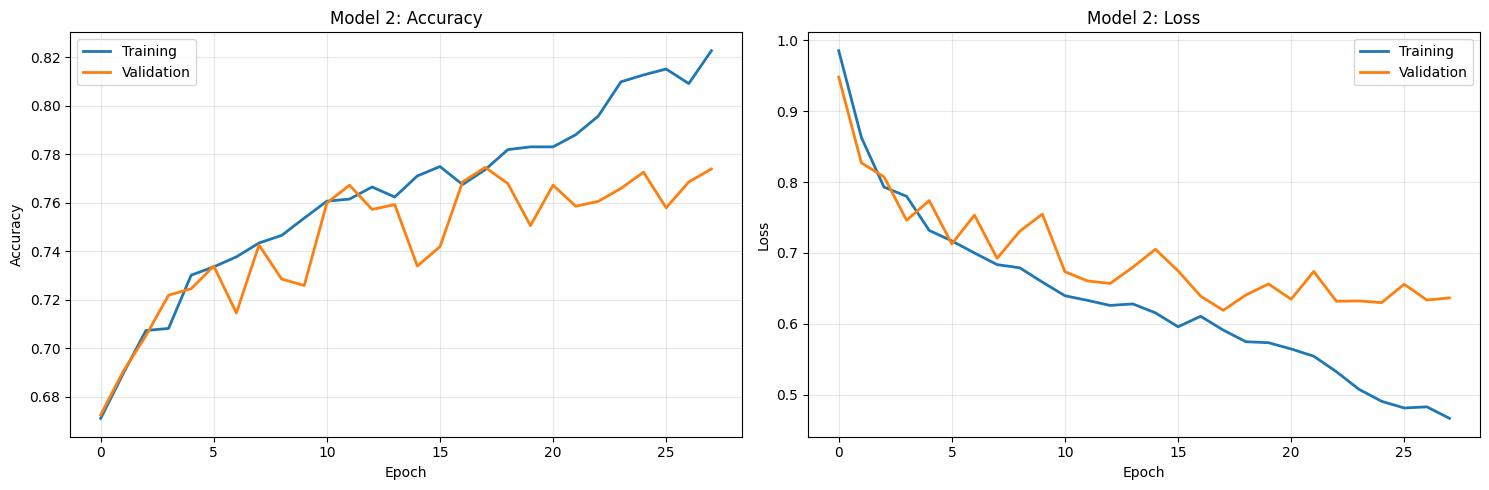

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

MODEL 2 - TEST RESULTS
Test Accuracy: 0.7538
Test Loss: 0.6403

Classification Report:
              precision    recall  f1-score   support

       akiec     0.4000    0.4898    0.4404        49
         bcc     0.5676    0.5455    0.5563        77
         bkl     0.4884    0.5091    0.4985       165
          df     1.0000    0.1176    0.2105        17
         mel     0.4742    0.2754    0.3485       167
          nv     0.8530    0.9175    0.8841      1006
        vasc     0.7500    0.5455    0.6316        22

    accuracy                         0.7538      1503
   macro avg     0.6476    0.4858    0.5100      1503
weighted avg     0.7417    0.7538    0.7397      1503



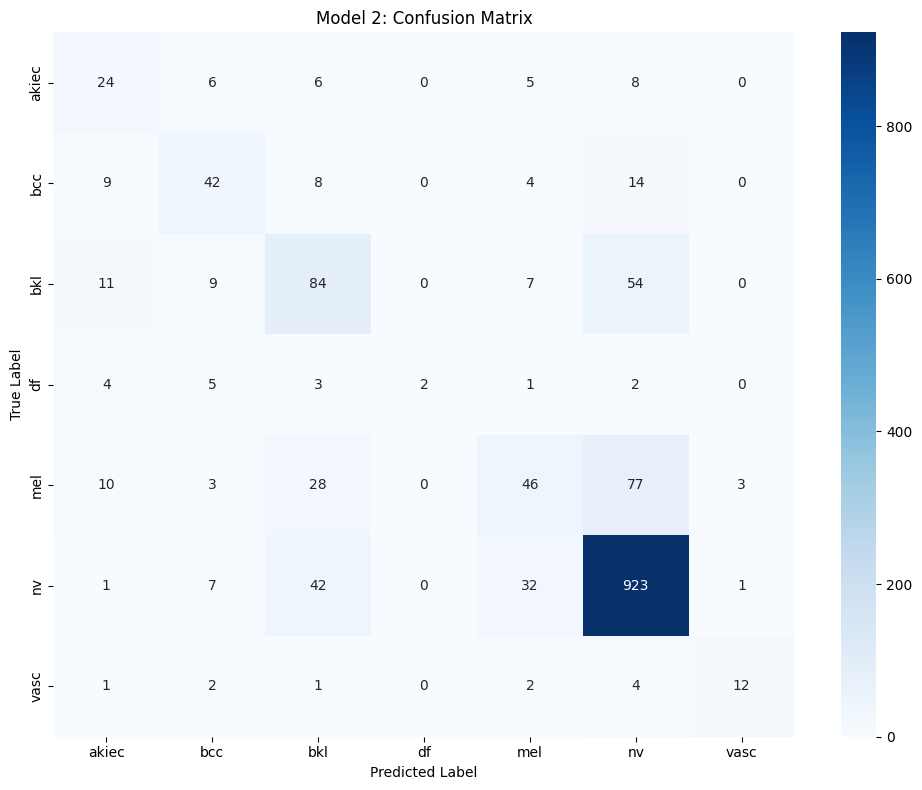


COMPARISON: MODEL 1 vs MODEL 2
Model 1 Test Accuracy: 64.94%
Model 2 Test Accuracy: 75.38%
Improvement: +10.44%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import os
import kagglehub

print("="*70)
print("LOADING DATA")
print("="*70)

# Download dataset
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")
print(f"Dataset path: {path}")

# Load metadata
metadata = pd.read_csv(os.path.join(path, 'HAM10000_metadata.csv'))

# Create label mapping
label_mapping = {
    'nv': 'Melanocytic Nevi (Benign Moles)',
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma'
}

# Label encoding
label_encoder = LabelEncoder()
metadata['label'] = label_encoder.fit_transform(metadata['dx'])

# Load images
def load_and_preprocess_images(metadata, img_size=(96, 96)):
    images = []
    labels = []

    for idx, row in metadata.iterrows():
        img_id = row['image_id']
        label = row['label']

        img_found = False
        for root, dirs, files in os.walk(path):
            for file in files:
                if img_id in file and (file.endswith('.jpg') or file.endswith('.png')):
                    img_path = os.path.join(root, file)

                    try:
                        img = Image.open(img_path)
                        img = img.convert('RGB')
                        img = img.resize(img_size, Image.LANCZOS)
                        img = np.array(img)
                        img = img.astype('float32') / 255.0

                        images.append(img)
                        labels.append(label)
                        img_found = True

                    except:
                        pass
                    break
            if img_found:
                break

        if (idx + 1) % 1000 == 0:
            print(f"Loaded {idx + 1}/{len(metadata)} images...")

    return np.array(images), np.array(labels)

print("\nLoading images at 96×96...")
X, y = load_and_preprocess_images(metadata)

# Train/val/test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=42)

print(f"\nTraining: {X_train.shape[0]} samples")
print(f"Validation: {X_val.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")


# STEP 2: BUILD AND TRAIN MODEL 2

from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

print("\n" + "="*70)
print("MODEL 2: SIMPLE CNN + DATA AUGMENTATION")
print("="*70)

# Data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(96, 96, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Build model
model2 = models.Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7)  # NO activation
])

# Compile
model2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

print("\nModel 2 Architecture:")
model2.summary()

# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1),
    keras.callbacks.ModelCheckpoint('best_model2_simple.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
]

# Train
print("\nTraining Model 2...")
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history2.history['accuracy'], label='Training', linewidth=2)
axes[0].plot(history2.history['val_accuracy'], label='Validation', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model 2: Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history2.history['loss'], label='Training', linewidth=2)
axes[1].plot(history2.history['val_loss'], label='Validation', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Model 2: Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluate
test_loss_m2, test_accuracy_m2 = model2.evaluate(X_test, y_test, verbose=0)
y_test_pred_m2 = model2.predict(X_test)
y_test_pred_classes_m2 = np.argmax(y_test_pred_m2, axis=1)

print(f"\n{'='*70}")
print("MODEL 2 - TEST RESULTS")
print('='*70)
print(f"Test Accuracy: {test_accuracy_m2:.4f}")
print(f"Test Loss: {test_loss_m2:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_classes_m2, target_names=label_encoder.classes_, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_classes_m2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Model 2: Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Comparison with Model 1
print("\n" + "="*70)
print("COMPARISON: MODEL 1 vs MODEL 2")
print("="*70)
print(f"Model 1 Test Accuracy: 64.94%")
print(f"Model 2 Test Accuracy: {test_accuracy_m2*100:.2f}%")
print(f"Improvement: {(test_accuracy_m2-0.6494)*100:+.2f}%")

model2.save('model2_simple_augmented.keras')

### **Model 2 Discussion:**

Model 2 employed a fundamentally simpler approach, with fewer CNN layers and filters. (Three convolutional blocks with 16 -> 32 -> 64 filters, a single 0.2 dropout, and a 128-unit dense layer, totaling only 350,000 parameters.)


Because Model 1 struggled with unreliable predictions from the changing the class weights, I did not use any class weighting in Model 2.
Instead, I allowed the model to naturally learn the class distribution while training. This represented a modern approach: start simple and let data augmentation handle generalization rather than building complex training filters and constraining it with heavy regularization.

Because I didn't use any weight class distribution, I decided to use three types of data augmentation as a primary regularization mechanism. It effectively multiplied training data size by showing the model different variations each epoch, while naturally helping minority classes (melanoma and Basal Cell Carcinoma) without class weighting distortions.

The first type of data augmentation used is called random flips, which randomly flips the image over the horizontal axis. The second data augmentation was a  +-10% rotation, that randomly rotated the image left or right up to 36°. And the third was a +-10% zoom, which randomly zoomed or zoomed out the image up 10%. This allowed the model to end up seeing each training image about 20 times.



### **Results and Discussion:**


Overall, Model 2 performed much better than Model 1. It had a greater test accuracy of 75.38%, and also had a lower loss score of 0.6691. The decrease in loss indicates that the model was more confident in each correct classification. This is essential because we don't want the model to be guessing on each label. This also means that Model 2 beats our hypothetical model (guessing that everything is a melanocytic nevi or benign mole).

In the hypothetical model discussed above, the test accuracy would be roughly 66.93%, and the test loss would be about 0.96-1.0.

Model 1's extreme class weights created oversensitivity, achieving 50% melanoma recall but only 32% precision, meaning two-thirds of melanoma predictions were false positives. Model 2 had betterperformance with 48% precision and 39% recall on melanoma, plus 87% precision and 91% recall on benign moles versus Model 1's 94% precision but only 69% recall.

Overall the simpler approach succeeded because data augmentation naturally increased effective training size while reflecting real-world imaging variation Model 2 also had fewer parameters, which reduced overfitting risk. This demonstrates that complexity doesn't guarantee better performance and that extreme class weighting can distort CNN learning, which creates unreliable predictions.

### **Conclusion:**

In this project, we compared the accuracy of two different CNN models in classifying skin cancer. Model 1. had more parameters and used class weighting to achieve a 64.94% accuracy. Model 2. was a more simple design with data augmentation achieved 75.91%, demonstrating that simplicity with appropriate augmentation outperforms heavy regularization and that extreme class weights create unreliable precision-recall trade-offs. While Model 2 showed significant improvement, neither model achieved clinical-grade performance, indicating future work must pursue larger datasets, domain-specific medical image pre-training, ensemble methods, and advanced techniques like focal loss to reach the 85% melanoma sensitivity required for real clinical screening applications.